# AI: K-NN

Build a classification system using k-Nearest Neighbors method to determine class/label of data testing in file DataTest_Tugas3_AI.csv

### Read the Data Train

In [1]:
import pandas as pd

input_data_train = pd.read_csv('DataTrain_KNN.csv')

### Shuffle Data Train

In [2]:
data_train = input_data_train.sample(len(input_data_train))
data_train.head()

,Index,X1,X2,X3,X4,X5,Y
731,732,1.883441,2.394509,2.527362,1.207222,-1.350574,2
90,91,-1.389664,0.426532,-1.701228,0.843361,1.103412,0
63,64,0.565149,0.381194,-0.658621,0.168079,0.619766,0
67,68,-0.808326,0.501562,2.292328,0.586364,0.339666,1
415,416,0.775205,2.533203,2.837809,2.132197,-1.235145,2


## KNN Algorithm

### Euclidiean Distance Function

In [3]:
import numpy as np

def euclidean(a, b):
    sum = 0
    for i in range(len(a)-1):
        if i > 0 : sum += (a[i]-b[i])**2
    return np.sqrt(sum)

### K-NN Function

In [4]:
def k_nearest_neighbors(k_value, data_test, data_train):
    y_predict = []
    for index, data_test in data_test.iterrows():
        list_distance = []
        for idx, data in data_train.iterrows():
            list_distance.append(euclidean(data_test, data))
        y_predict.append(stats.mode(np.array(data_train.iloc[np.argsort(list_distance)[:k_value]]['Y']))[0])
        
    return y_predict

## Training Process
*run this chapter of code if you're going to find the best k, if not skip this chapter and move to Test Process

### Observe The Best k

In [5]:
from sklearn.metrics import accuracy_score
from scipy import stats

k_performance = []

for k_value in range(1,25):
    idx = 80
    temp_k_performance = []
    while idx < 800:
        if idx == 80:
            data_validation = data_train.iloc[:idx]
            temp_train = data_train.iloc[idx:]
        elif idx == 720:
            data_validation = data_train.iloc[idx:]
            temp_train = data_train.iloc[:idx]
        else:
            data1 = data_train.iloc[:idx_temp]
            data2 = data_train.iloc[idx:]
            data_validation = data_train.iloc[idx_temp:idx]
            temp_train = pd.concat([data1,data2])
        idx_temp = idx
        idx += 80
        predict_of_y = k_nearest_neighbors(k_value, data_validation, temp_train)
        temp_k_performance.append(accuracy_score(predict_of_y, data_validation['Y']))
    k_performance.append(sum(temp_k_performance)/9)

### the Best K

In [6]:
print("K terbaik:",k_performance.index(max(k_performance))+1)
print("Akurasi K terbaik:",k_performance[k_performance.index(max(k_performance))]*100,"%")

K terbaik: 8
Akurasi K terbaik: 87.36111111111113 %


### Graph of Accuracy

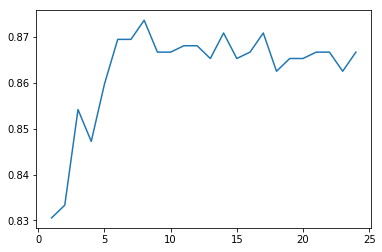

In [8]:
import matplotlib.pyplot as plt

plt.plot([x for x in range(1,25)], k_performance)
plt.show()

## Data Test Classification Process

 ### Read the Data Test

In [10]:
data_test = pd.read_csv('DataTest_KNN.csv')
data_test.head()

,Index,X1,X2,X3,X4,X5,Y
0,1,-0.362948,-1.320339,2.871917,-2.414415,-0.216239,?
1,2,0.257170,0.749144,1.935534,0.403116,-0.261486,?
2,3,0.674156,0.171398,1.497770,-0.324638,0.032498,?
3,4,-0.341077,0.555523,1.303567,-0.167549,1.121396,?
4,5,-0.828400,2.110397,1.497370,0.984645,-0.107470,?


### Label Prediction for Data Test

In [11]:
k = 8
y_prediction = k_nearest_neighbors(k, data_test, data_train)

### Write the Result

In [0]:
import csv

with open('TebakanTugas3.csv','w',newline='\n') as Write:
    file = csv.writer(Write,dialect='excel')
    for y in y_prediction:
        file.writerow(y)
Write.close()